# Pearson Correlation

Dependencies

In [43]:
import pandas as pd
from scipy.stats import pearsonr

Load the dataset

In [44]:
file_path = 'C:\\Users\\Shadow\\Desktop\\GIT_PE\\survey_data\\survey_data.csv'
dataset = pd.read_csv(file_path)

Selecting relevant columns

In [45]:

appliance_columns = [
    'Rooms', 'Members', 'Fans', 'Lights', 'Freezes', 'Microwave Oven', 
    'Geyser', 'AC', 'Washing Machine', 'TV', 'PC', 'Induction Stove'
]

unit_columns = [col for col in dataset.columns if 'unit' in col]

target_column = 'pre_23_dec_unit' 


Creating a subset of the dataset with the selected columns

In [46]:
# Prepare data, excluding the target column from the features
features = [col for col in appliance_columns + unit_columns if col != target_column]
selected_data = dataset[features + [target_column]].dropna()

Calculating the Pearson correlation matrix

In [47]:
correlation_matrix = selected_data.corr()

In [48]:
print(correlation_matrix)

                        Rooms   Members      Fans    Lights   Freezes  \
Rooms                1.000000  0.363759  0.667475  0.526109  0.279100   
Members              0.363759  1.000000  0.261274  0.206226  0.246951   
Fans                 0.667475  0.261274  1.000000  0.574634  0.282001   
Lights               0.526109  0.206226  0.574634  1.000000  0.228729   
Freezes              0.279100  0.246951  0.282001  0.228729  1.000000   
Microwave Oven       0.515199  0.355042  0.285018  0.259588  0.447892   
Geyser               0.413861  0.235459  0.343093  0.281573  0.393726   
AC                   0.432053  0.280545  0.382700  0.302114  0.623237   
Washing Machine      0.445379  0.323348  0.222583  0.223992  0.470647   
TV                   0.311767  0.225469  0.374316  0.273303  0.544491   
PC                   0.423042  0.352727  0.214867  0.232397  0.308054   
Induction Stove      0.158439  0.142586  0.111373  0.093134  0.243186   
post_21_july_unit    0.370476  0.289371  0.323310  

Save the correlation matrix to a CSV file

In [49]:
correlation_matrix.to_csv('correlation_matrix.csv')

Visualize correlations using a heatmap

In [50]:
# Dependencies

import seaborn as sns
import matplotlib.pyplot as plt
import os 

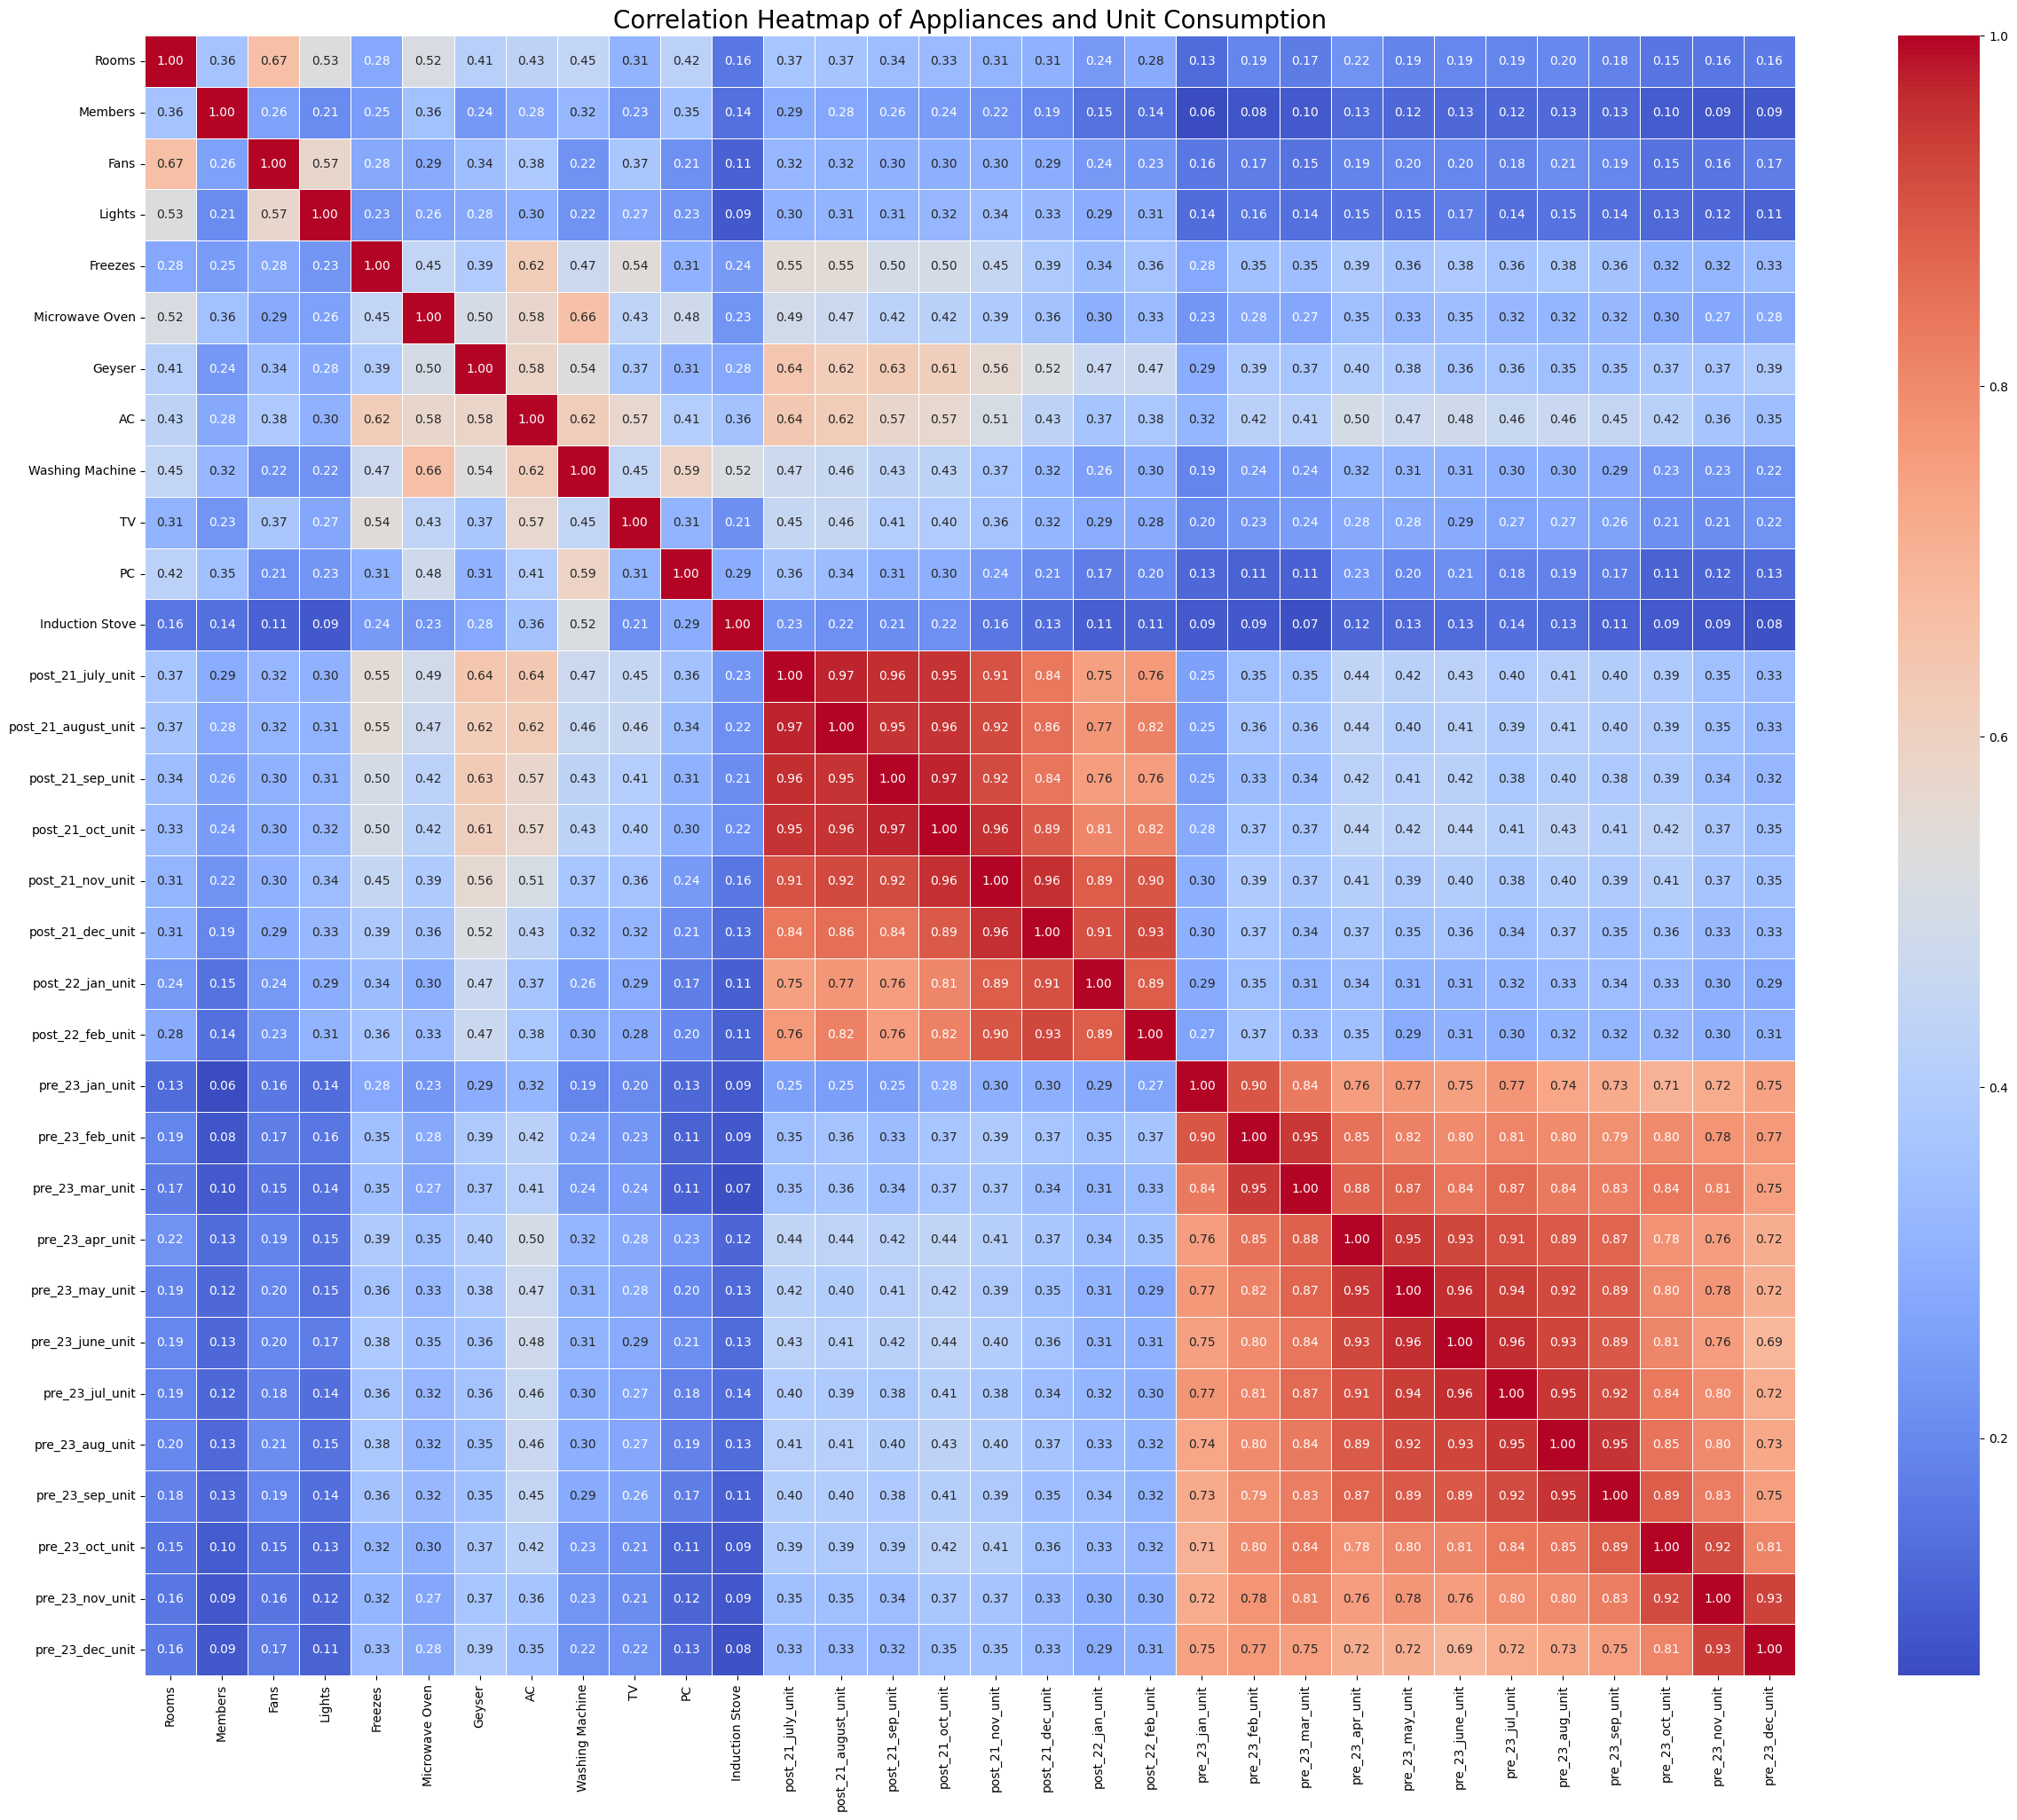

In [51]:

# Setting up the figure size for better visibility
plt.figure(figsize=(30, 24))

# Creating a heatmap for the correlation matrix with larger annotations
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 10})
# heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="RdGy", linewidths=0.5, annot_kws={"size": 10})

# Adding a title for clarity
plt.title('Correlation Heatmap of Appliances and Unit Consumption', fontsize=20)

# Get the directory of the current script
try:
    current_directory = os.path.dirname(os.path.abspath(__file__))
except NameError:
    current_directory = os.getcwd()

# Save the heatmap to a file in the same directory as the script
output_file_path = os.path.join(current_directory, 'correlation_heatmap.png')
plt.savefig(output_file_path, bbox_inches='tight')

# Displaying the heatmap
plt.show()


# Bar Chart 

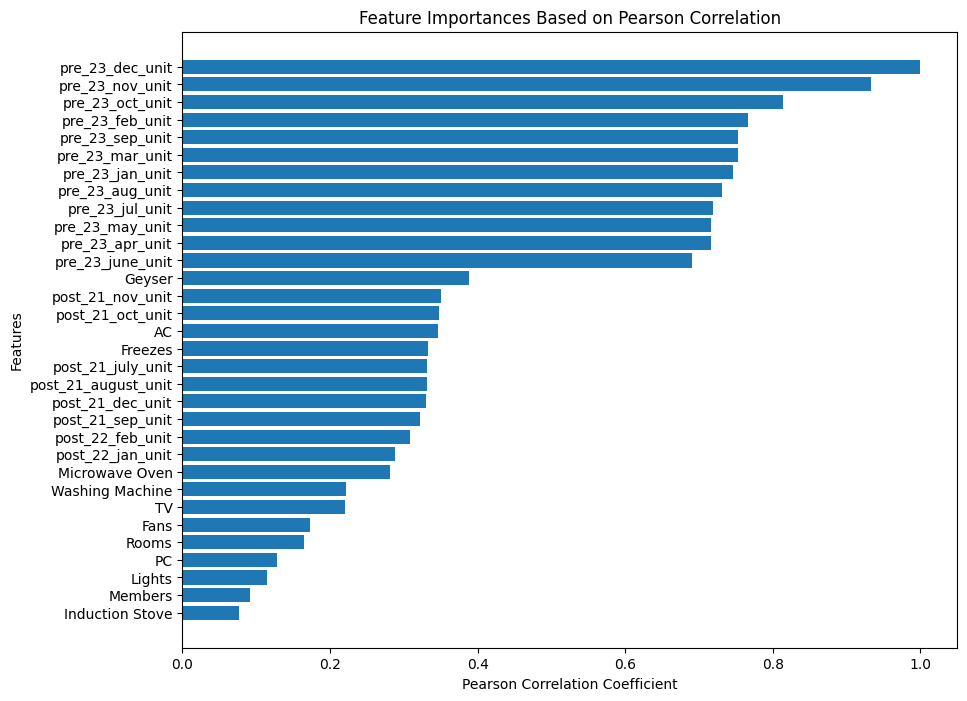

In [52]:
# Define target column
target_column = 'pre_23_dec_unit'

# Calculate Pearson correlation coefficients between each feature and the target variable
correlations = {}
for feature in appliance_columns + unit_columns:
    corr, _ = pearsonr(selected_data[feature], selected_data[target_column])
    correlations[feature] = corr

# Convert to DataFrame for better visualization
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Plot the correlations as a bar chart
plt.figure(figsize=(10, 8))
plt.barh(correlation_df['Feature'], correlation_df['Correlation'])
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Features')
plt.title('Feature Importances Based on Pearson Correlation')
plt.gca().invert_yaxis()  # To display the highest correlation at the top

# Save the bar chart to a file in the same directory as the script
output_bar_chart_path = os.path.join(current_directory, 'correlation_bar_chart_dont_use.png')
plt.savefig(output_bar_chart_path, bbox_inches='tight')

# Display the bar chart
plt.show()

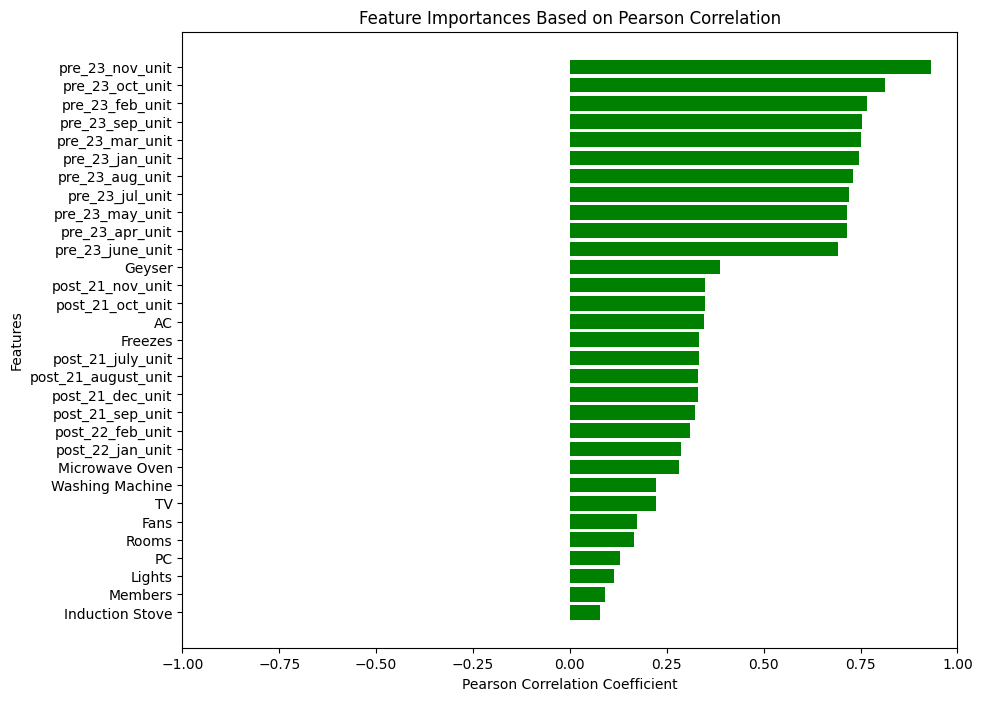

In [53]:
# Calculate Pearson correlation coefficients between each feature and the target variable
correlations = {}
for feature in features:
    corr, _ = pearsonr(selected_data[feature], selected_data[target_column])
    correlations[feature] = corr

# Convert to DataFrame for better visualization
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

# Plot the correlations as a bar chart
plt.figure(figsize=(10, 8))
plt.barh(correlation_df['Feature'], correlation_df['Correlation'], color=['red' if x < 0 else 'green' for x in correlation_df['Correlation']])
plt.xlabel('Pearson Correlation Coefficient')
plt.ylabel('Features')
plt.title('Feature Importances Based on Pearson Correlation')
plt.gca().invert_yaxis()  # To display the highest correlation at the top

# Set x-axis range from -1 to 1
plt.xlim(-1, 1)

# Save the bar chart to a file in the same directory as the script
output_bar_chart_path = os.path.join(current_directory, 'correlation_bar_chart_red_green.png')
plt.savefig(output_bar_chart_path, bbox_inches='tight')

# Display the bar chart
plt.show()